## Coding Exercise #0504

### 1. Classification with SVM:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.datasets import load_iris
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### 1.1. Read in data:

In [2]:
# Load data.
data = load_iris()

In [3]:
# Explanatory variables.
X = data['data']
columns = list(data['feature_names'])
print(columns)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# Response variable.
Y = data['target']
labels = list(data['target_names'])
print(labels)

['setosa', 'versicolor', 'virginica']


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#### 1.2. SVM hyperparameter optimization (RBF kernel):

C     : Penalty parameter. <br>
gamma : kernel parameter ($\gamma$).

In [41]:
C_grid = 0.02*np.arange(1,20)
gamma_grid = 0.02*np.arange(1,50)
print(C_grid,gamma_grid)
parameters = {'C': C_grid, 'gamma' : gamma_grid}
gridCV = GridSearchCV(SVC(kernel='rbf'), parameters, n_jobs=-1)             
gridCV.fit(X_train, Y_train)
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38] [0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98]


In [7]:
print("SVM best C : " + str(best_C))
print("SVM best gamma : " + str(best_gamma))

SVM best C : 0.12
SVM best gamma : 0.86


In [8]:
X_test

array([[6.1, 3. , 4.6, 1.4],
       [6.1, 2.9, 4.7, 1.4],
       [6.3, 2.9, 5.6, 1.8],
       [4.6, 3.4, 1.4, 0.3],
       [5.2, 2.7, 3.9, 1.4],
       [4.7, 3.2, 1.6, 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 3.9, 1.2],
       [4.4, 3.2, 1.3, 0.2],
       [7.7, 3.8, 6.7, 2.2],
       [5.9, 3. , 4.2, 1.5],
       [5. , 3.5, 1.6, 0.6],
       [5.7, 2.6, 3.5, 1. ],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3. , 1.6, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.7, 4.2, 1.3],
       [6.4, 2.9, 4.3, 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [7.2, 3.6, 6.1, 2.5],
       [5.3, 3.7, 1.5, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [5.8, 2.6, 4. , 1.2],
       [7.1, 3. , 5.9, 2.1],
       [4.8, 3.4, 1.6, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [6.2, 2.8, 4.8, 1.8],
       [5. , 3.5, 1.3, 0.3],
       [6.3, 2.8, 5.1, 1.5],
       [6.7, 3

In [9]:
SVM_best = SVC(kernel='rbf', C=best_C,gamma=best_gamma)
SVM_best.fit(X_train, Y_train);
Y_pred = SVM_best.predict(X_test)
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

SVM best accuracy : 0.978


In [13]:
# Initialize the range of threshoulds from zero to 100 with step size 0.01
#0.01*100=1
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []                                                   # True Positive Rate.
FPR = []                                                   # False Positive Rate.
cutoff_grid

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [15]:
FPR, TPR, cutoffs = metrics.roc_curve(Y_test,Y_pred,pos_label=1)      # positive label = 1.

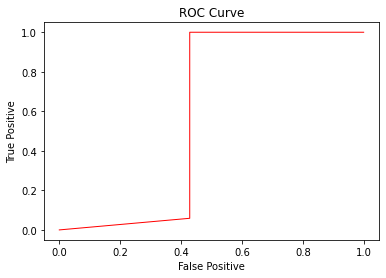

In [16]:
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [25]:
# Alternative way.
accuracy = metrics.accuracy_score(Y_test,Y_pred)                      # Alternative way to calculate the accuracy.
# precision = metrics.precision_score(Y_test,Y_pred)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
# print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.978



'binary':

    Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.
'micro':

    Calculate metrics globally by counting the total true positives, false negatives and false positives.
'macro':

    Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
'weighted':

    Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
'samples':

    Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

Note that for “micro”-averaging in a multiclass setting with all labels included will produce equal precision, recall and F, while “weighted” averaging may produce an F-score that is not between precision and recall

In [27]:
# for multi-class
print("Precision Score : ",precision_score(Y_test, Y_pred, pos_label='positive',average='micro'))


Precision Score :  0.9777777777777777


In [28]:
# for multi-class
print("Recall Score : ",recall_score(Y_test, Y_pred, 
                                           pos_label='positive',
                                           average='micro'))

Recall Score :  0.9777777777777777


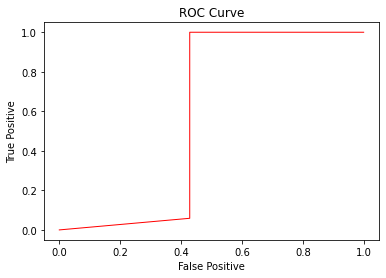

In [29]:
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

Only used for multiclass targets. Determines the type of configuration to use. The default value raises an error, so either 'ovr' or 'ovo' must be passed explicitly.

'ovr':

    Stands for One-vs-rest. Computes the AUC of each class against the rest [3] [4]. This treats the multiclass case in the same way as the multilabel case. Sensitive to class imbalance even when average == 'macro', because class imbalance affects the composition of each of the ‘rest’ groupings.
'ovo':

    Stands for One-vs-one. Computes the average AUC of all possible pairwise combinations of classes [5]. Insensitive to class imbalance when average == 'macro'

In [38]:
Y_pred

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       2])